## Mounting Drive
 

In [39]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data processing and cleaning unwanted elements 

In [40]:
myDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
myDF = myDF.drop(
    columns=['patient_id', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1',
             'coronavirusnl63', 'rhinovirus_enterovirus', 'mycoplasma_pneumoniae', 'coronavirus_hku1','myeloblasts',
             'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e',
             'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2',
             'influenza_b_rapid_test', 'influenza_a_rapid_test', 'strepto_a', 'fio2_venous_blood_gas_analysis',
             'urine_esterase', 'urine_aspect', 'urine_ph', 'urine_hemoglobin', 'urine_bile_pigments',
             'urine_ketone_bodies', 'urine_nitrite', 'urine_urobilinogen', 'urine_protein', 'urine_sugar',
             'urine_leukocytes', 'urine_crystals', 'urine_hyaline_cylinders', 'urine_granular_cylinders',
             'urine_yeasts', 'urine_color', 'partial_thromboplastin_time_ptt', 'prothrombin_time_pt_activity',
             'lipase_dosage', 'd_dimer'])
mapping = {'negative': 0, 'positive': 1 , 'f' : 0 , 't' : 1}

myDF = myDF.replace({'sars_cov_2_exam_result': mapping, 'patient_addmited_to_regular_ward_1_yes_0_no': mapping , 'patient_addmited_to_semi_intensive_unit_1_yes_0_no' : mapping , 'patient_addmited_to_intensive_care_unit_1_yes_0_no' : mapping})
myDF

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,0,0,0,NaN,N

## Filling null values with mean in each column

In [41]:
myDF.fillna(myDF.mean(), inplace=True)
myDF

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,13,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656614e-09,6.332993e-09,5.243001e-09
1,17,0,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01,-6.190860e-01,1.198059e+00,-1.478949e-01,2.089928e+00,-3.057871e-01,8.625116e-01,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656614e-09,6.332993e-09,5.243001e-09
2,8,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2

## The correclation for each column
### We aim for the second column "Exam Result"

In [42]:
myDF.corr()


,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
patient_age_quantile,1.000000,0.075244,4.616576e-02,0.015736,-0.035772,0.031292,0.019498,-0.051183,0.038392,-0.012099,-0.040620,-0.040213,-0.053667,0.034682,0.063669,0.007124,0.090847,0.016385,0.053681,0.038632,0.024183,0.087847,0.026245,0.098785,0.000476,-0.001231,0.026923,0.008113,0.040960,0.027392,0.050402,0.001514,-0.083812,-0.037983,-0.012330,0.036681,-0.010471,0.097924,-0.012574,0.088728,0.045224,0.090102,0.007478,0.045603,0.020867,0.028753,0.014337,-0.015191,0.020489,-0.018227,0.002446,-0.022409,4.883140e-03,-0.015002,2.721363e-02,0.007064,-7.563036e-03,-0.016286,-0.034110,0.041484,0.041507,0.006264,0.012090,-0.007157,-0.021239,-4.135060e-02,-0.004455
sars_cov_2_exam_result,0.075244,1.000000,1.424375e-01,0.019364,0.027586,0.037396,0.039530,-0.106482,0.040622,0.045766,-0.005749,0.017285,-0.108835,-0.023763,-0.010744,-0.072659,-0.020835,0.074431,-0.015035,-0.004426,-0.013552,-0.021883,0.024927,0.026500,-0.027329,-0.028995,0.029047,0.038741,0.028945,-0.031222,-0.017776,-0.035217,-0.013557,-0.031266,-0.008157,-0.001436,0.000980,0.018950,0.000481,0.010074,0.016281,0.011304,0.016171,0.023767,-0.004159,-0.012876,-0.009500,-0.025434,-0.009073,0.007260,-0.007760,0.021468,7.146244e-19,-0.009575,1.089999e-02,-0.014025,1.443716e-16,0.015189,-0.037511,0.015111,0.036451,-0.028879,-0.024761,0.036186,-0.030815,-5.314858e-03,0.030967
patient_addmited_to_regular_ward_1_yes_0_no,0.046166,0.142437,1.000000e+00,-0.011264,-0.010192,-0.071569,-0.075363,-0.150186,-0.010687,-0.043593,-0.078183,-0.028416,-0.084493,0.026112,-0.041591,-0.070246,-0.032258,-0.000290,0.083800,0.032264,0.098700,-0.009664,0.104537,0.067162,-0.020496,-0.066047,-0.002221,-0.003999,0.016408,-0.017261,-0.005733,-0.022926,-0.027986,-0.051858,-0.001463,-0.059500,-0.038534,0.018216,-0.030931,-0.017714,0.078920,-0.014713,0.026029,0.019365,-0.009393,-0.010522,-0.021456,-0.072308,-0.017335,0.008739,-0.044848,0.055351,0.000000e+00,-0.032667,6.283876e-02,-0.019630,6.245285e-17,0.051133,-0.058510,0.008632,0.052540,-0.041230,-0.034427,0.027247,-0.040326,-2.287540e-17,0.070462
patient_addmited_to_semi_intensive_unit_1_yes_0_no,0.015736,0.019364,-1.126431e-02,1.000000,-0.008087,-0.161800,-0.157295,0.006185,-0.020840,-0.122487,-0.098180,-0.020768,0.122801,-0.118077,-0.048372,-0.079716,-0.045169,-0.033664,0.082048,0.127423,0.063871,0.066570,0.205412,-0.028718,-0.011826,-0.105629,0.013371,0.051278,0.080077,0.018878,0.041978,-0.005071,0.149635,0.014418,-0.003057,-0.104523,0.098533,-0.017138,0.119488,-0.068025,0.088598,-

## Description of our data frame

In [43]:
myDF.describe()

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,9.318391,0.098866,0.013997,0.008859,0.007264,-2.186213e-09,-1.601319e-08,-3.535002e-10,7.438143e-09,8.424448e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220113e-09,1.020432e-08,7.069992e-09,5.908361e-09,-6.675261e-09,2.779702e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439588e-10,-1.479160e-09,-2.783734e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935233e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611543e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733550e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379732e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.263489e-01,3.266203e-01,1.919891e-01,3.015113e-01,2.652407e-01,2.994472e-01,2.741119e-01,2.564082e-01,2.560624e-01,1.996808e-01,2.001240e-01,1.646610e-01,1.795894e-01,1.795894e-01,1.795894e-01,1.597446e-01,9.413042e-02,8.419280e-02,1.552439e-01,1.552439e-01,1.552439e-01,1.552439e-01,1.552439e-01,1.552439e-01,1.552439e-01,1.311085e-01,1.311085e-01,1.311085e-01,1.311085e-01,1.311085e-01,1.113766e-01,1.113766e-01,1.269889e-01,1.535221e-01,1.337845e-01,2.305715e-02,1.357568e-01,6.384235e-02,6.917145e-02,4.799728e-02,6.917145e-02,6.91

## Here, we're splitting data to X and Y and taking 0.2 segments as a test sample, the shapes of X test and X train are available in the output section

X train shape:
(4515, 66) 

X test shape:
(1129, 66)


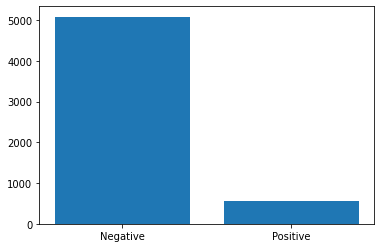

{0: 5086, 1: 558}

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = myDF.sars_cov_2_exam_result
X = myDF.drop('sars_cov_2_exam_result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle= True)
print("X train shape:")
print(X_train.shape, "\n")
print("X test shape:")
print(X_test.shape)


import numpy as np
import matplotlib.pyplot as plt

counts = myDF['sars_cov_2_exam_result'].value_counts().to_dict()

height = [counts[0], counts[1]]
bars = ('Negative', 'Positive')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()
counts


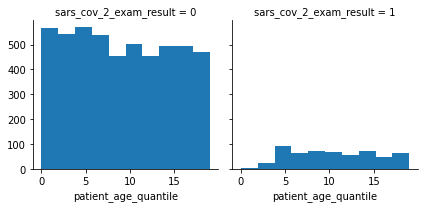

In [45]:
import seaborn as sb
from matplotlib import pyplot as plt
g = sb.FacetGrid(myDF, col = "sars_cov_2_exam_result")
g.map(plt.hist, "patient_age_quantile")
plt.show()

## Building the model and printing the accuracy:

In [46]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("svm accuracy is:", acc_svc)


svm accuracy is: 89.88




## Building a classification model using keras framework   
  

In [0]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [48]:
target_column = ['sars_cov_2_exam_result'] 
predictors = list(set(list(myDF.columns))-set(target_column))
myDF[predictors] = myDF[predictors]/myDF[predictors].max()
myDF.describe()

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,0.490442,0.098866,0.013997,0.008859,0.007264,-8.210501e-10,-5.993257e-09,-3.708547e-11,2.003242e-09,2.310786e-09,-2.089938e-09,3.046657e-10,1.374563e-09,-5.988091e-10,-8.424964e-10,8.629212e-10,-1.218233e-09,-7.103092e-10,1.461481e-09,1.009064e-09,2.329861e-09,-5.935375e-10,3.463085e-10,-1.321759e-09,5.992314e-09,2.742610e-09,3.429048e-10,-7.522421e-11,-1.738561e-10,-5.535803e-10,1.723299e-09,4.579763e-10,-5.246841e-10,5.374839e-09,-2.410171e-09,-3.407389e-09,8.837229e-09,-3.202850e-10,-2.095159e-09,-3.019101e-09,1.288174e-09,-1.587459e-09,7.470864e-10,-1.783316e-08,7.525823e-10,1.401923e-09,2.110539e-09,-1.022035e-09,9.661243e-10,-2.087891e-10,-6.422984e-10,5.876378e-10,-2.284242e-08,-8.984354e-10,1.895239e-09,-5.511406e-10,-2.919634e-09,-1.031757e-10,2.600443e-09,-9.721721e-10,3.969804e-10,-3.851445e-09,2.991342e-09,-1.119870e-08,1.638582e-09,2.212515e-09,2.869840e-09
std,0.304100,0.298509,0.117489,0.093713,0.084929,1.227668e-01,1.223457e-01,3.426554e-02,8.774600e-02,8.959042e-02,8.677250e-02,9.805266e-02,7.222851e-02,2.948311e-02,7.969176e-02,3.911211e-02,9.575557e-02,7.198772e-02,4.677911e-02,2.740162e-02,1.188958e-01,2.358415e-02,3.730652e-02,5.424122e-02,7.537793e-02,6.250105e-02,2.517832e-02,2.767518e-02,1.935377e-02,3.571360e-02,2.567068e-02,2.715021e-02,4.114110e-02,2.652561e-02,3.890761e-02,2.733397e-02,9.089871e-02,4.624770e-02,4.112332e-02,5.138385e-02,5.565128e-02,5.579511e-02,3.750631e-02,8.728236e-02,1.338121e-02,2.136578e-02,2.001398e-02,4.456115e-02,1.423890e-02,2.698630e-02,2.083111e-02,4.535013e-02,2.650873e-02,1.881236e-02,1.660076e-02,2.302563e-02,2.445109e-02,5.172607e-02,2.13

In [49]:
X = myDF[predictors].values
y = myDF[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3950, 66)
(1694, 66)


In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [0]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=66))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              67000     
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 102       
Total params: 622,752
Trainable params: 622,752
Non-trainable params: 0
_________________________________________________________________


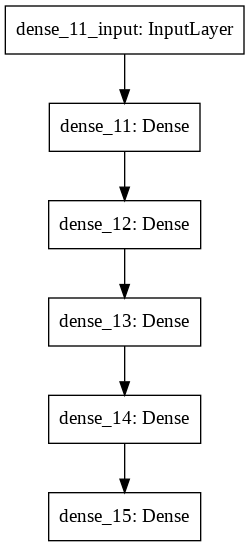

In [53]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [54]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 3950 samples, validate on 1694 samples
Epoch 1/10
3950/3950 [==============================] - 2s 395us/step - loss: 0.3492 - accuracy: 0.9005 - val_loss: 0.3036 - val_accuracy: 0.9002
Epoch 2/10
3950/3950 [==============================] - 1s 372us/step - loss: 0.3052 - accuracy: 0.9043 - val_loss: 0.2883 - val_accuracy: 0.9097
Epoch 3/10
3950/3950 [==============================] - 1s 368us/step - loss: 0.2934 - accuracy: 0.9084 - val_loss: 0.2897 - val_accuracy: 0.9085
Epoch 4/10
3950/3950 [==============================] - 1s 358us/step - loss: 0.2871 - accuracy: 0.9104 - val_loss: 0.2950 - val_accuracy: 0.9103
Epoch 5/10
3950/3950 [==============================] - 1s 355us/step - loss: 0.2849 - accuracy: 0.9106 - val_loss: 0.3138 - val_accuracy: 0.9038
Epoch 6/10
3950/3950 [==============================] - 1s 364us/step - loss: 0.2831 - accuracy: 0.9119 - val_loss: 0.2994 - val_accuracy: 0.9073
Epoch 7/10
3950/3950 [==============================] - 1s 369us/step - loss

In [55]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=1)

print('Accuracy on training data: {:.2f}% \nError on training data: {:.2f}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy on test data: {:.2f}% \nError on test data: {:.2f}'.format(scores2[1], 1 - scores2[1]))    

3950/3950 [==============================] - 0s 60us/step
Accuracy on training data: 0.92% 
Error on training data: 0.08
1694/1694 [==============================] - 0s 66us/step
Accuracy on test data: 0.91% 
Error on test data: 0.09


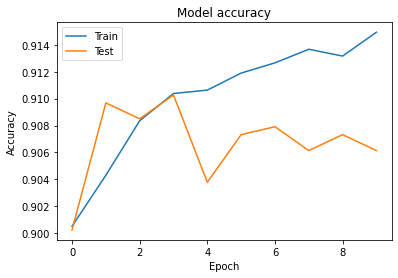

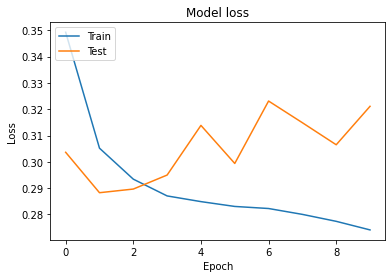

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Update 2:  To Be Handled - > Class Imbaalnce

Random under-sampling:
1    558
0    558
Name: sars_cov_2_exam_result, dtype: int64
(1116, 67)


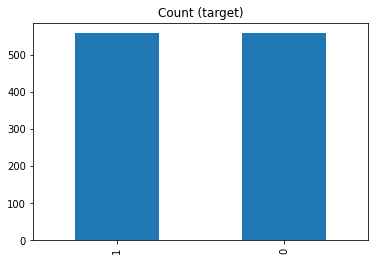

In [57]:
# Class count
count_class_0, count_class_1 = myDF.sars_cov_2_exam_result.value_counts()

# Divide by class
df_class_0 = myDF[myDF['sars_cov_2_exam_result'] == 0]
df_class_1 = myDF[myDF['sars_cov_2_exam_result'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
 
print('Random under-sampling:')
print(df_test_under.sars_cov_2_exam_result.value_counts())

df_test_under.sars_cov_2_exam_result.value_counts().plot(kind='bar', title='Count (target)');
print(df_test_under.shape)


In [0]:
myDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diagnosis-of-covid-19-and-its-clinical-spectrum2.csv")
myDF = myDF.drop(
    columns=['patient_id', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1',
             'coronavirusnl63', 'rhinovirus_enterovirus', 'mycoplasma_pneumoniae', 'coronavirus_hku1','myeloblasts',
             'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e',
             'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2',
             'influenza_b_rapid_test', 'influenza_a_rapid_test', 'strepto_a', 'fio2_venous_blood_gas_analysis',
             'urine_esterase', 'urine_aspect', 'urine_ph', 'urine_hemoglobin', 'urine_bile_pigments',
             'urine_ketone_bodies', 'urine_nitrite', 'urine_urobilinogen', 'urine_protein', 'urine_sugar',
             'urine_leukocytes', 'urine_crystals', 'urine_hyaline_cylinders', 'urine_granular_cylinders',
             'urine_yeasts', 'urine_color', 'partial_thromboplastin_time_ptt', 'prothrombin_time_pt_activity',
             'lipase_dosage', 'd_dimer','vitamin_b12'])
mapping = {'negative': 0, 'positive': 1 , 'f' : 0 , 't' : 1}

myDF = myDF.replace({'sars_cov_2_exam_result': mapping, 'patient_addmited_to_regular_ward_1_yes_0_no': mapping , 'patient_addmited_to_semi_intensive_unit_1_yes_0_no' : mapping , 'patient_addmited_to_intensive_care_unit_1_yes_0_no' : mapping})
myDF.fillna(myDF.mean(), inplace=True)

X train shape:
(945, 65) 

X test shape:
(237, 65)


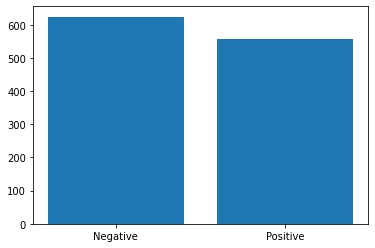

{0: 624, 1: 558}

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = myDF.sars_cov_2_exam_result
X = myDF.drop('sars_cov_2_exam_result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle= True)
print("X train shape:")
print(X_train.shape, "\n")
print("X test shape:")
print(X_test.shape)


import numpy as np
import matplotlib.pyplot as plt

counts = myDF['sars_cov_2_exam_result'].value_counts().to_dict()

height = [counts[0], counts[1]]
bars = ('Negative', 'Positive')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)
 
plt.show()
counts

In [60]:
from sklearn.svm import SVC
df_test_under = X_test
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("svm accuracy is:", acc_svc)

svm accuracy is: 55.98


That's quit unfortunate, we really hoped for better result from this dataset!



In [0]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [62]:
target_column = ['sars_cov_2_exam_result'] 
predictors = list(set(list(myDF.columns))-set(target_column))
myDF[predictors] = myDF[predictors]/myDF[predictors].max()
myDF.describe()

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.0,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.0,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.525292,0.472081,0.043993,0.026227,0.025381,-0.106933,-0.105707,-0.024193,0.022859,-0.053672,-0.012677,-0.037606,-0.036556,-0.010580,-0.045615,-0.078519,-0.047786,0.027035,0.031469,0.046720,0.014440,-0.008615,0.049908,-0.014489,-0.001749,-0.052083,0.025838,0.046578,0.010246,-0.032407,-0.010079,-0.053708,0.095196,-0.004426,-0.139122,0.001865,0.008902,-0.110877,0.026566,-0.049445,-0.074427,-0.055970,0.080250,0.031572,1.0,0.027371,0.016192,-0.513995,0.030330,0.031032,0.013463,0.173292,0.002577,0.448639,-0.007577,1.0,-0.026479,0.021306,-0.028319,-0.096064,-0.000978,-0.003947,0.004649,-0.083128,0.100690,-0.041848
std,0.287422,0.499431,0.205167,0.159877,0.157345,0.165018,0.165670,0.052466,0.143655,0.150293,0.120548,0.211464,0.103303,0.041280,0.135729,0.079095,0.151967,0.097103,0.095558,0.058598,0.125887,0.068744,0.067937,0.083319,0.106463,0.089997,0.046417,0.053254,0.034437,0.051911,0.044465,0.057749,0.074259,0.044759,0.081997,0.044593,0.134941,0.145041,0.063114,0.075823,0.123311,0.082093,0.064286,0.129232,0.0,0.037785,0.036356,0.117849,0.029039,0.059950,0.058442,0.076829,0.033259,0.020288,0.049819,0.0,0.104698,0.045891,0.086063,0.171471,0.077128,0.073492,0.063224,0.046623,0.032835,0.080349
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.690545,-1.626429,-0.267774,-0.784591,-1.311019,-0.579531,-2.667155,-0.478259,-0.102918,-1.660483,-0.227448,-1.619243,-0.459905,-0.277325,-0.250452,-1.035842,-0.331210,-0.093372,-0.518936,-0.645406,-1.403846,-0.080945,-0.092020,-0.077503,-0.166667,-0.100605,-0.210643,-0.215620,-0.591760,-1.352941,-0.420245,-1.134902,-2.229668,-0.375720,-0.849787,-2.252217,-0.939042,-0.196423,-1.472058,1.0,-0.051491,-0.035587,-1.849873,-0.025863,-0.764136,-0.408699,-0.384602,-0.

In [63]:
X = myDF[predictors].values
y = myDF[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape); print(X_test.shape)

(827, 65)
(355, 65)


In [64]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [0]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=65))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              66000     
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 102       
Total params: 621,752
Trainable params: 621,752
Non-trainable params: 0
_________________________________________________________________


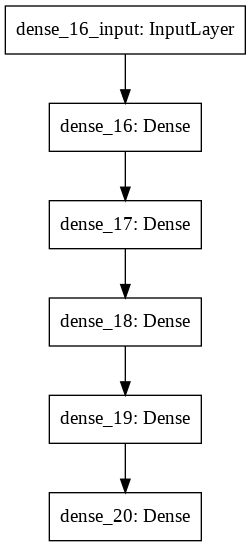

In [67]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
history = model.fit(X_train, y_train, epochs=40,  verbose=0, validation_data=(X_test, y_test))

In [70]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=1)

print('Accuracy on training data: {:.2f}% \nError on training data: {:.2f}'.format(scores[1], 1 - scores[1]))   

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy on test data: {:.2f}% \nError on test data: {:.2f}'.format(scores2[1], 1 - scores2[1]))    

827/827 [==============================] - 0s 58us/step
Accuracy on training data: 0.60% 
Error on training data: 0.40
355/355 [==============================] - 0s 66us/step
Accuracy on test data: 0.59% 
Error on test data: 0.41


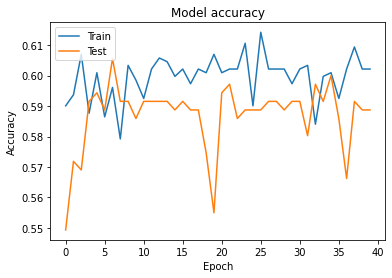

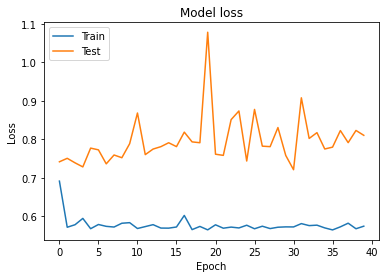

In [71]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Update 3:  Credit: Sahithya Gadde

In [0]:
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
import pandas as pd
myDF = pd.read_csv("diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
myDF = myDF.drop(
    columns=['patient_id', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1',
             'coronavirusnl63', 'rhinovirus_enterovirus', 'mycoplasma_pneumoniae', 'coronavirus_hku1','myeloblasts',
             'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e',
             'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2',
             'influenza_b_rapid_test', 'influenza_a_rapid_test', 'strepto_a', 'fio2_venous_blood_gas_analysis',
             'urine_esterase', 'urine_aspect', 'urine_ph', 'urine_hemoglobin', 'urine_bile_pigments',
             'urine_ketone_bodies', 'urine_nitrite', 'urine_urobilinogen', 'urine_protein', 'urine_sugar',
             'urine_leukocytes', 'urine_crystals', 'urine_hyaline_cylinders', 'urine_granular_cylinders',
             'urine_yeasts', 'urine_color', 'partial_thromboplastin_time_ptt', 'prothrombin_time_pt_activity',
             'lipase_dosage', 'd_dimer'])
mapping = {'negative': 0, 'positive': 1 , 'f' : 0 , 't' : 1}

myDF = myDF.replace({'sars_cov_2_exam_result': mapping, 'patient_addmited_to_regular_ward_1_yes_0_no': mapping , 'patient_addmited_to_semi_intensive_unit_1_yes_0_no' : mapping , 'patient_addmited_to_intensive_care_unit_1_yes_0_no' : mapping})


,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,0,0,0,NaN,N

In [0]:
myDF.fillna(myDF.mean(), inplace=True)


,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,13,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656614e-09,6.332993e-09,5.243001e-09
1,17,0,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01,-6.190860e-01,1.198059e+00,-1.478949e-01,2.089928e+00,-3.057871e-01,8.625116e-01,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656614e-09,6.332993e-09,5.243001e-09
2,8,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439584e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215407e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-2.554485e-09,7.557017e-09,-9.824941e-10,-4.733639e-09,1.733551e-09,-1.986822e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-5.731215e-09,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2

In [0]:
corr= myDF.corr()



                                                    patient_age_quantile  ...  cto2_arterial_blood_gas_analysis
patient_age_quantile                                            1.000000  ...                         -0.004455
sars_cov_2_exam_result                                          0.075244  ...                          0.030967
patient_addmited_to_regular_ward_1_yes_0_no                     0.046166  ...                          0.070462
patient_addmited_to_semi_intensive_unit_1_yes_0_no              0.015736  ...                         -0.017481
patient_addmited_to_intensive_care_unit_1_yes_0_no             -0.035772  ...                         -0.121242
...                                                                  ...  ...                               ...
hco3_arterial_blood_gas_analysis                                0.012090  ...                         -0.434762
po2_arterial_blood_gas_analysis                                -0.007157  ...                          0

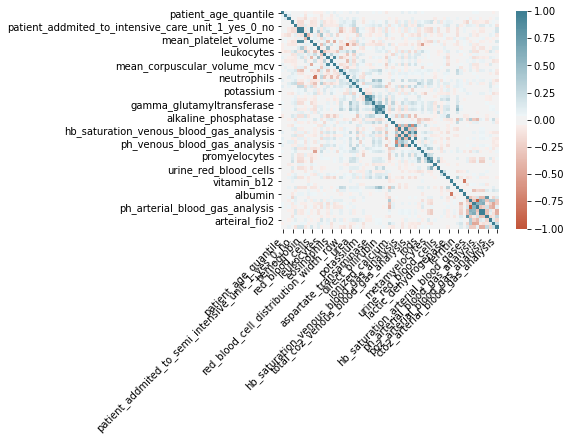

In [0]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=500),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array(myDF.loc[:, myDF.columns != 'sars_cov_2_exam_result'])
y = np.array(myDF.loc[:, myDF.columns == 'sars_cov_2_exam_result'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (5644, 66)
Shape of y: (5644, 1)


X train shape:
(4515, 66) 

X test shape:
(1129, 66)


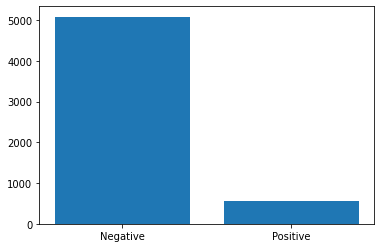

{0: 5086, 1: 558}

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = myDF.sars_cov_2_exam_result
X = myDF.drop('sars_cov_2_exam_result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("X train shape:")
print(X_train.shape, "\n")
print("X test shape:")
print(X_test.shape)


import numpy as np
import matplotlib.pyplot as plt

counts = myDF['sars_cov_2_exam_result'].value_counts().to_dict()

# Make a fake dataset:
height = [counts[0], counts[1]]
bars = ('Negative', 'Positive')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
counts


Before OverSampling, counts of label '1': 451
Before OverSampling, counts of label '0': 4064 

After OverSampling, the shape of train_X: (8128, 66)
After OverSampling, the shape of train_y: (8128,) 

After OverSampling, counts of label '1': 4064
After OverSampling, counts of label '0': 4064


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


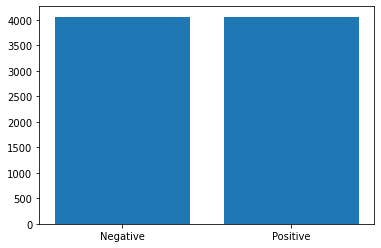

1    4064
0    4064
dtype: int64

In [0]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
df = pd.DataFrame(y_train_res)
counts = pd.value_counts(df.values.flatten())

# Make a fake dataset:
height = [counts[0], counts[1]]
bars = ('Negative', 'Positive')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
counts


In [0]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_res, y_train_res)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train_res, y_train_res) * 100, 2)
print("svm accuracy is:", acc_svc)

svm accuracy is: 62.04


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train_res, y_train_res)
Y_pred= knn.predict(X_test)
acc_knn= round(knn.score(X_train_res, y_train_res) * 100, 2)
print("KNN accuracy is:",acc_knn)

KNN accuracy is: 56.46


Average precision-recall score: 0.18
Accuracy Score: 0.32152347209920284

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.26      0.41      1022
           1       0.11      0.92      0.20       107

    accuracy                           0.32      1129
   macro avg       0.54      0.59      0.31      1129
weighted avg       0.89      0.32      0.39      1129


Confusion matrix:
[[265 757]
 [  9  98]]



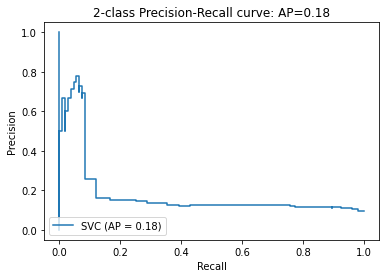

In [0]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

predicted = svc.predict(X_test)

# print the accuracy score
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
# print the ROC score

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))
# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

In [0]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 


Using TensorFlow backend.


In [0]:
target_column = ['sars_cov_2_exam_result'] 
predictors = list(set(list(myDF.columns))-set(target_column))
myDF[predictors] = myDF[predictors]/myDF[predictors].max()
myDF.describe()

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_red_blood_cells,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,0.490442,0.098866,0.013997,0.008859,0.007264,-8.210501e-10,-5.993257e-09,-3.708547e-11,2.003242e-09,2.310786e-09,-2.089938e-09,3.046657e-10,1.374563e-09,-5.988091e-10,-8.424964e-10,8.629212e-10,-1.218233e-09,-7.103092e-10,1.461481e-09,1.009064e-09,2.329861e-09,-5.935375e-10,3.463085e-10,-1.321759e-09,5.992314e-09,2.742610e-09,3.429048e-10,-7.522421e-11,-1.738561e-10,-5.535803e-10,1.723299e-09,4.579763e-10,-5.246841e-10,5.374839e-09,-2.410171e-09,-3.407389e-09,8.837229e-09,-3.202850e-10,-2.095159e-09,-3.019101e-09,1.288174e-09,-1.587459e-09,7.470864e-10,-1.783316e-08,7.525823e-10,1.401923e-09,2.110539e-09,-1.022035e-09,9.661243e-10,-2.087891e-10,-6.422984e-10,5.876378e-10,-2.284242e-08,-8.984354e-10,1.895239e-09,-5.511406e-10,-2.919634e-09,-1.031757e-10,2.600443e-09,-9.721721e-10,3.969804e-10,-3.851445e-09,2.991342e-09,-1.119870e-08,1.638582e-09,2.212515e-09,2.869840e-09
std,0.304100,0.298509,0.117489,0.093713,0.084929,1.227668e-01,1.223457e-01,3.426554e-02,8.774600e-02,8.959042e-02,8.677250e-02,9.805266e-02,7.222851e-02,2.948311e-02,7.969176e-02,3.911211e-02,9.575557e-02,7.198772e-02,4.677911e-02,2.740162e-02,1.188958e-01,2.358415e-02,3.730652e-02,5.424122e-02,7.537793e-02,6.250105e-02,2.517832e-02,2.767518e-02,1.935377e-02,3.571360e-02,2.567068e-02,2.715021e-02,4.114110e-02,2.652561e-02,3.890761e-02,2.733397e-02,9.089871e-02,4.624770e-02,4.112332e-02,5.138385e-02,5.565128e-02,5.579511e-02,3.750631e-02,8.728236e-02,1.338121e-02,2.136578e-02,2.001398e-02,4.456115e-02,1.423890e-02,2.698630e-02,2.083111e-02,4.535013e-02,2.650873e-02,1.881236e-02,1.660076e-02,2.302563e-02,2.445109e-02,5.172607e-02,2.13

In [0]:
X = myDF[predictors].values
y = myDF[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train_res.shape); print(X_test.shape)

(8128, 66)
(1694, 66)


In [0]:
y_train_res = to_categorical(y_train_res)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [0]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=66))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              67000     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 622,752
Trainable params: 622,752
Non-trainable params: 0
_________________________________________________________________


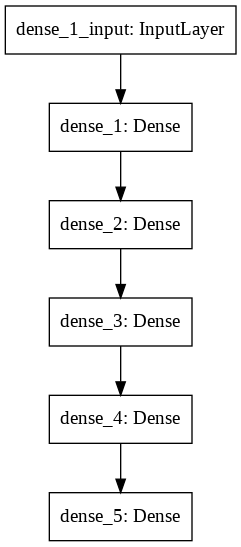

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
history = model.fit(X_train_res, y_train_res, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 8128 samples, validate on 1694 samples
Epoch 1/20
8128/8128 [==============================] - 6s 682us/step - loss: 0.6437 - accuracy: 0.5913 - val_loss: 0.4725 - val_accuracy: 0.9002
Epoch 2/20
8128/8128 [==============================] - 5s 564us/step - loss: 0.6042 - accuracy: 0.6197 - val_loss: 0.8239 - val_accuracy: 0.9002
Epoch 3/20
8128/8128 [==============================] - 3s 336us/step - loss: 0.5932 - accuracy: 0.6255 - val_loss: 0.7499 - val_accuracy: 0.9002
Epoch 4/20
8128/8128 [==============================] - 3s 340us/step - loss: 0.5846 - accuracy: 0.6283 - val_loss: 0.7322 - val_accuracy: 0.9002
Epoch 5/20
8128/8128 [==============================] - 3s 340us/step - loss: 0.5790 - accuracy: 0.6284 - val_loss: 0.5225 - val_accuracy: 0.9002
Epoch 6/20
8128/8128 [==============================] - 3s 341us/step - loss: 0.5775 - accuracy: 0.6261 - val_loss: 0.8075 - val_accuracy: 0.9002
Epoch 7/20
8128/8128 [==============================] - 3s 339us/step - loss

In [0]:
pred_train= model.predict(X_train_res)
scores = model.evaluate(X_train_res, y_train_res, verbose=1)

print('Accuracy on training data: {:.2f}% \nError on training data: {:.2f}'.format(scores[1], 1 - scores[1]))   

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy on test data: {:.2f}% \nError on test data: {:.2f}'.format(scores2[1], 1 - scores2[1])) 

8128/8128 [==============================] - 1s 72us/step
Accuracy on training data: 0.64% 
Error on training data: 0.36
1694/1694 [==============================] - 0s 71us/step
Accuracy on test data: 0.90% 
Error on test data: 0.10


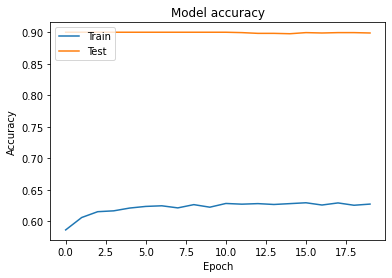

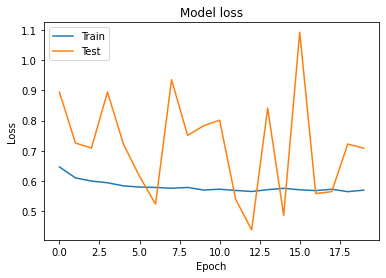

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()